**LUKMANUL HAKIM**
**A11.2022.14197**
**DATA MINING**

**IMPORT LIBRARY**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**IMPORT DATASET**

In [3]:
datas = pd.read_csv('dataset/heart_attack_classification.csv')
print('total ada',len(datas),'data')
datas.head()

total ada 1319 data


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,62,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,96,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [4]:
missing_values = datas.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


**PEMILIHAN ATRIBUT YANG PALING BERPENGARUH**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Memisahkan fitur dan target
X = datas.iloc[:, :-1].values
y = LabelEncoder().fit_transform(datas['class'])  # Encode label menjadi numerik

# Membuat model Random Forest dan melatihnya
model = RandomForestClassifier()
model.fit(X, y)

# Mendapatkan kepentingan fitur
importances = model.feature_importances_

# Membuat DataFrame untuk menampilkan kepentingan fitur
feature_importances = pd.DataFrame({'Fitur': datas.columns[:-1], 'Kepentingan': importances})
feature_importances = feature_importances.sort_values(by='Kepentingan', ascending=False)
print(feature_importances)

           Fitur  Kepentingan
7       troponin     0.593198
6            kcm     0.275440
0            age     0.044638
5        glucose     0.021868
3  pressurehight     0.021804
4    pressurelow     0.018577
2        impluse     0.016665
1         gender     0.007812


In [6]:
X = datas.iloc[:, [7,6]].values
y = datas.iloc[:, -1].values
print(X)
print(y)

[[1.200e-02 1.800e+00]
 [1.060e+00 6.750e+00]
 [3.000e-03 1.990e+00]
 ...
 [4.250e+00 1.240e+00]
 [3.590e-01 5.800e+00]
 [1.770e+00 5.089e+01]]
['negative' 'positive' 'negative' ... 'positive' 'positive' 'positive']


**LABEL ENCODING UNTUK Y (TARGET)**

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**SPLIT DATA**

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
print(len(X_train))
print(len(X_test)) # 330 data
print(len(y_train))
print(len(y_test)) # 330 data

print(X_train)
print(y_train)
print(X_test)
print(y_test)

989
330
989
330
[[0.014 3.4  ]
 [0.013 3.24 ]
 [0.035 3.29 ]
 ...
 [0.066 2.74 ]
 [0.02  2.37 ]
 [0.075 1.02 ]]
[0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0
 1 0 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 0
 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 1 

**FEATURE SCALING**

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**SETELAH MENGGUNAKAN STANDAR SCALLER**

In [12]:
print(X_train)
print(X_test)

[[-0.30017441 -0.25621934]
 [-0.3010221  -0.25951923]
 [-0.28237284 -0.25848801]
 ...
 [-0.25609434 -0.26983135]
 [-0.29508825 -0.27746233]
 [-0.2484651  -0.30530507]]
[[-3.13384455e-01 -1.94503924e-01]
 [-2.58432455e-01 -2.28590223e-01]
 [-3.13384455e-01 -1.26587614e-01]
 [-3.05933336e-01 -2.32690831e-01]
 [-3.03139166e-01 -3.12396387e-01]
 [-3.12453065e-01 -2.72671753e-01]
 [-2.91962489e-01 -3.16240707e-01]
 [-2.22108251e-01 -2.41148334e-01]
 [-3.13384455e-01 -3.08808356e-01]
 [-3.13384455e-01 -2.08087186e-01]
 [-3.12453065e-01 -2.94712518e-01]
 [-3.10590285e-01 -2.87536455e-01]
 [-3.04070556e-01  4.10247131e-02]
 [-3.13384455e-01 -3.04195172e-01]
 [-3.09658895e-01 -2.98813125e-01]
 [ 1.12747562e+00 -3.10602371e-01]
 [-2.94756658e-01 -1.77332631e-01]
 [-3.08727505e-01 -2.51143564e-01]
 [-3.10590285e-01 -3.05476612e-01]
 [-3.09658895e-01 -2.57294475e-01]
 [-3.08727505e-01 -3.14190403e-01]
 [-3.12453065e-01 -3.02401157e-01]
 [-3.12453065e-01 -2.85486151e-01]
 [-3.13384455e-01 -3.049640

**TRAINING KNN MODEL DENGAN TRAINING DATA**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1
 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1
 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1
 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1]
[0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0

**AKURASI KNN**

In [18]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(acc)

0.9333333333333333


**CONFUSION MATRIX**

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[133   3]
 [ 19 175]]


**VISUALISASI DATA TRAINING**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24904\3631065.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


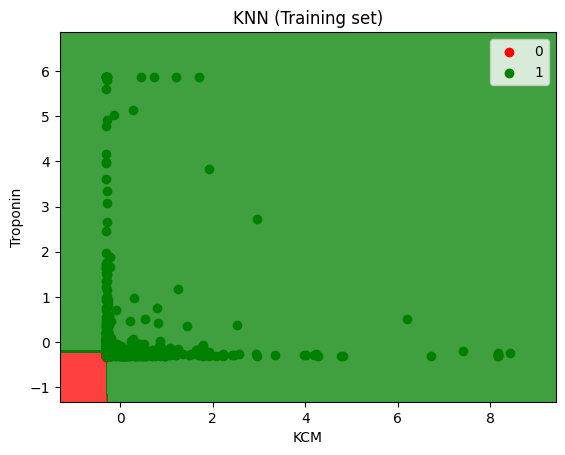

In [16]:
from matplotlib.colors import ListedColormap
# Membuat grid untuk plotting decision boundary
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))

# Plot decision boundary
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('KNN (Training set)')
plt.xlabel('KCM')
plt.ylabel('Troponin')
plt.legend()
plt.show()

**VISUALISASI DATA TEST**

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24904\3502332927.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


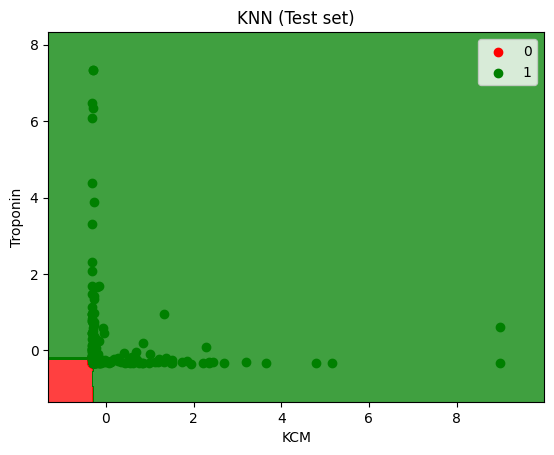

In [17]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Test set)')
plt.xlabel('KCM')
plt.ylabel('Troponin')
plt.legend()
plt.show()